In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

In [ ]:
print("🌦️  WEATHER PREDICTION ANALYSIS")
print("=" * 50)
df = pd.read_csv("/content/weatherAUS.csv")  # Replace with your path if needed
print(f"📊 Dataset Shape: {df.shape}")
print("\n🔍 First 5 rows:")
df.head()

🌦️  WEATHER PREDICTION ANALYSIS
📊 Dataset Shape: (145460, 23)

🔍 First 5 rows:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Data Preprocessing - Visualize missing data before dropping
print("\n📈 MISSING DATA ANALYSIS")
print("=" * 30)

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Filter out columns with no missing values
missing_data_to_plot = missing_data[missing_data > 0]
missing_percentage_to_plot = missing_percentage[missing_percentage > 0]

# Check if there are any missing values left to plot
if not missing_data_to_plot.empty:
    plt.figure(figsize=(15, 8))

    # Create a beautiful missing data visualization
    plt.subplot(2, 2, 1)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(missing_data_to_plot)))
    missing_data_to_plot.plot(kind='bar', color=colors)
    plt.title('🔴 Missing Values Count', fontsize=14, fontweight='bold')
    plt.xlabel('Columns')
    plt.ylabel('Missing Count')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    missing_percentage_to_plot.plot(kind='pie', autopct='%1.1f%%',
                                   colors=colors, startangle=90)
    plt.title('📊 Missing Data Percentage', fontsize=14, fontweight='bold')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing data found after initial cleaning.")



📈 MISSING DATA ANALYSIS
✅ No missing data found after initial cleaning.


In [ ]:

df = df.dropna()
print(f"\n✅ After cleaning - Dataset Shape: {df.shape}")





✅ After cleaning - Dataset Shape: (112925, 17)



📊 DATA DISTRIBUTION ANALYSIS


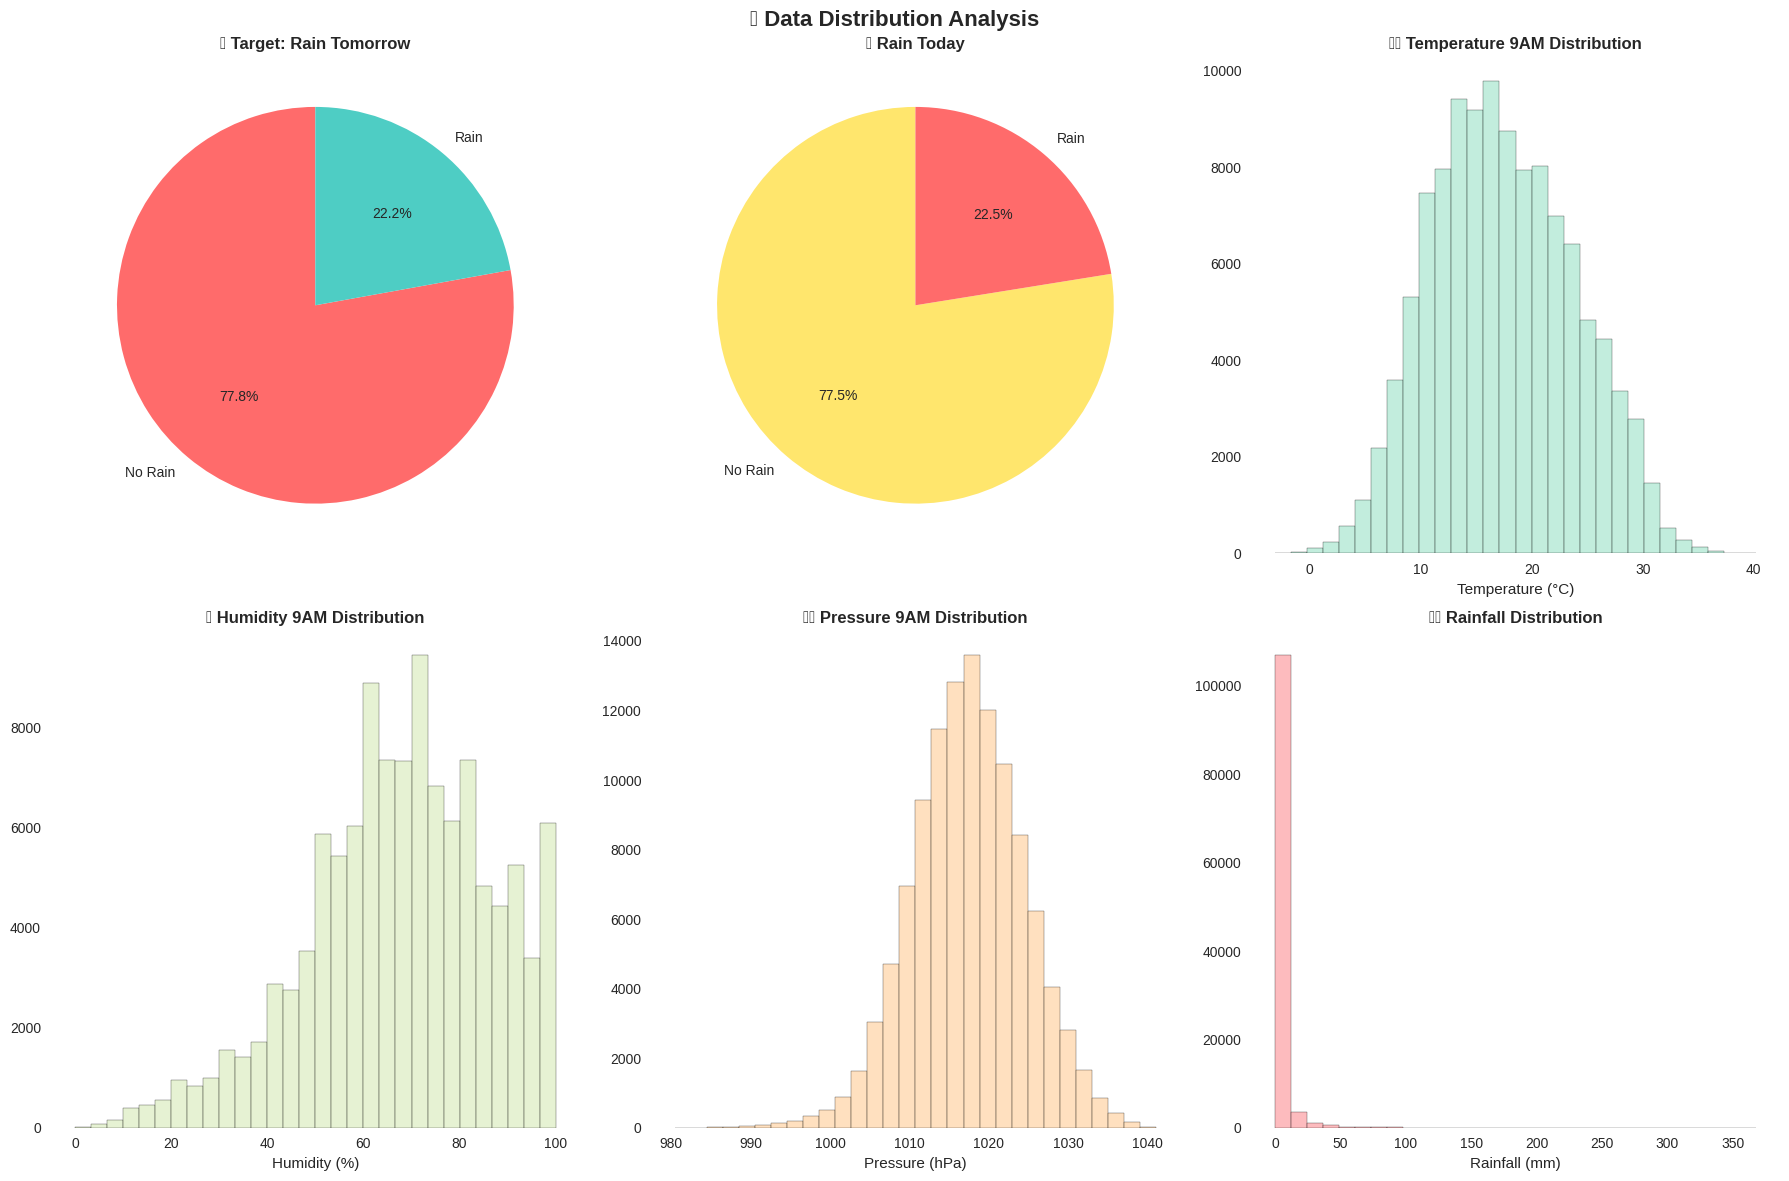

In [ ]:


# Visualize data distribution before encoding
print("\n📊 DATA DISTRIBUTION ANALYSIS")
print("=" * 35)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🌈 Data Distribution Analysis', fontsize=16, fontweight='bold')

# Categorical variables visualization
categorical_cols = ['RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# RainTomorrow distribution (target variable)
axes[0, 0].pie(df['RainTomorrow'].value_counts(), labels=['No Rain', 'Rain'],
               autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4'], startangle=90)
axes[0, 0].set_title('🎯 Target: Rain Tomorrow', fontweight='bold')

# RainToday distribution
axes[0, 1].pie(df['RainToday'].value_counts(), labels=['No Rain', 'Rain'],
               autopct='%1.1f%%', colors=['#FFE66D', '#FF6B6B'], startangle=90)
axes[0, 1].set_title('☔ Rain Today', fontweight='bold')

# Temperature distribution
axes[0, 2].hist(df['Temp9am'].dropna(), bins=30, color='#A8E6CF', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('🌡️ Temperature 9AM Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Temperature (°C)')

# Humidity distribution
axes[1, 0].hist(df['Humidity9am'].dropna(), bins=30, color='#DCEDC1', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('💧 Humidity 9AM Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Humidity (%)')

# Pressure distribution
axes[1, 1].hist(df['Pressure9am'].dropna(), bins=30, color='#FFD3A5', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('🌬️ Pressure 9AM Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Pressure (hPa)')

# Rainfall distribution
axes[1, 2].hist(df['Rainfall'].dropna(), bins=30, color='#FD9EA3', alpha=0.7, edgecolor='black')
axes[1, 2].set_title('🌧️ Rainfall Distribution', fontweight='bold')
axes[1, 2].set_xlabel('Rainfall (mm)')

plt.tight_layout()
plt.show()


🔄 ENCODING CATEGORICAL VARIABLES
✅ Encoded: RainToday
✅ Encoded: RainTomorrow
✅ Encoded: WindGustDir
✅ Encoded: WindDir9am
✅ Encoded: WindDir3pm

🔗 CORRELATION ANALYSIS


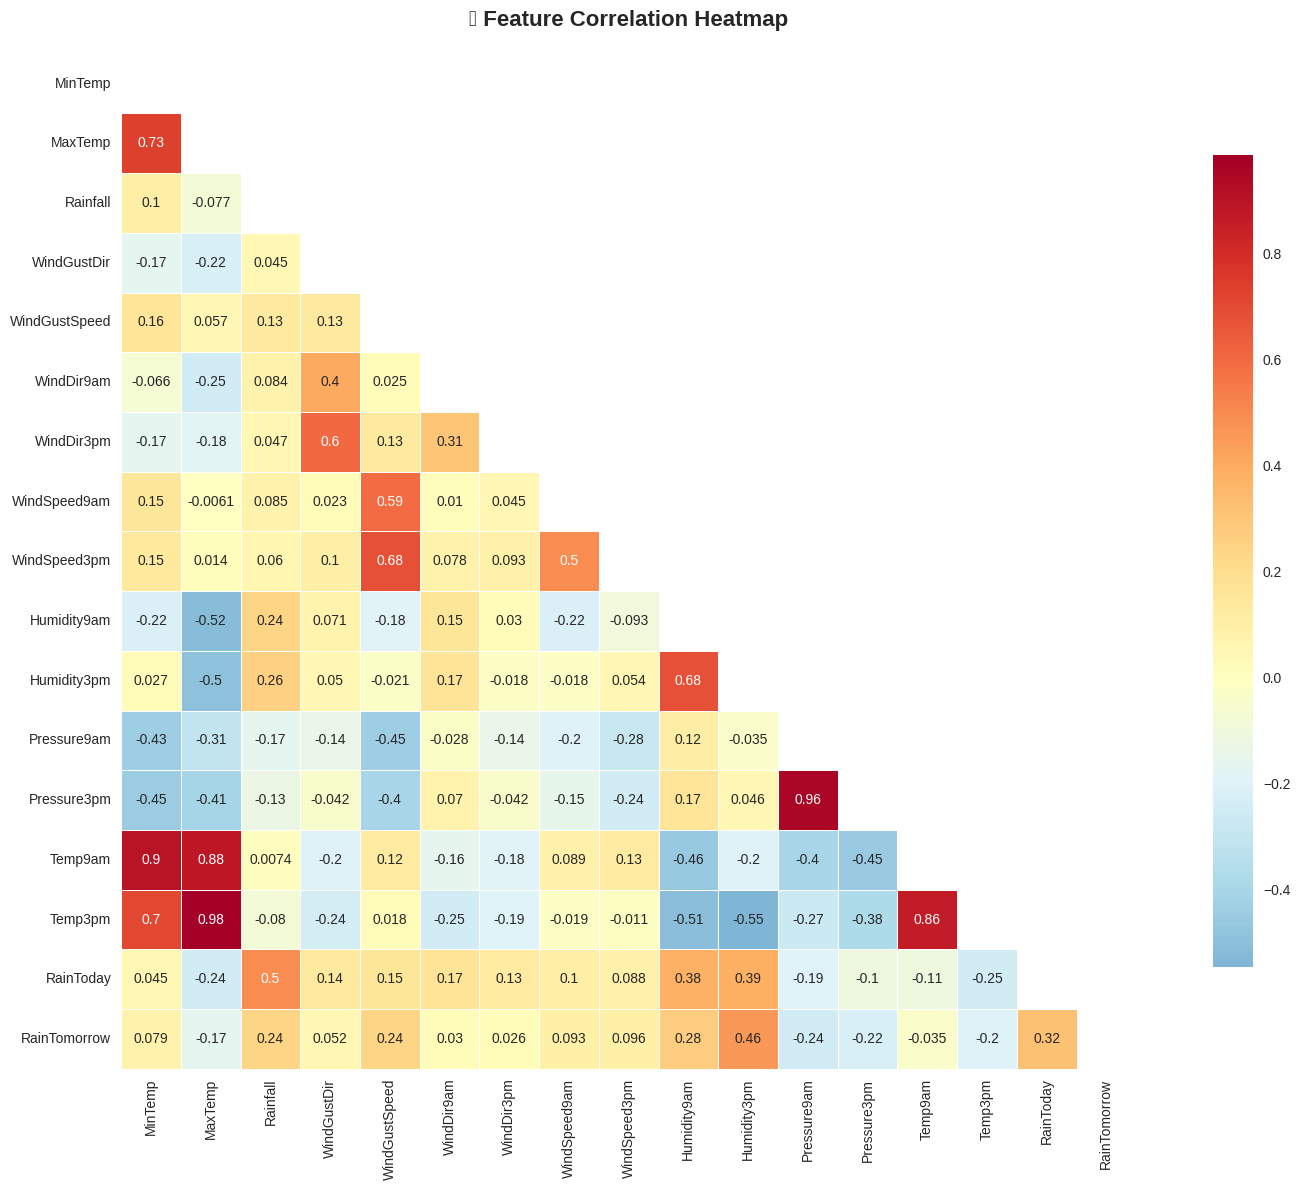

In [ ]:
# Encode categorical variables
print("\n🔄 ENCODING CATEGORICAL VARIABLES")
print("=" * 40)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"✅ Encoded: {col}")


# Correlation Analysis
print("\n🔗 CORRELATION ANALYSIS")
print("=" * 25)

plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()

# Create a beautiful correlation heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('🔥 Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Split features and target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\n📋 Training set size: {X_train.shape[0]}")
print(f"📋 Testing set size: {X_test.shape[0]}")


# Train models
print("\n🤖 TRAINING MACHINE LEARNING MODELS")
print("=" * 40)

# Train Random Forest
print("🌲 Training Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Train Decision Tree
print("🌳 Training Decision Tree...")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


# Train Logistic Regression
print("📈 Training Logistic Regression...")
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Enhanced model evaluation function
def evaluate_model(y_true, y_pred, model_name, color='blue'):
    print(f"\n🎯 {model_name}")
    print("=" * (len(model_name) + 5))

    accuracy = accuracy_score(y_true, y_pred)
    print(f"🎯 Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_true, y_pred)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Confusion Matrix Heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
    ax1.set_title(f'🔍 {model_name} - Confusion Matrix', fontweight='bold')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')

    # Classification metrics bar chart
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    no_rain_scores = [report['0'][metric] for metric in metrics]
    rain_scores = [report['1'][metric] for metric in metrics]

    x = np.arange(len(metrics))
    width = 0.35

    ax2.bar(x - width/2, no_rain_scores, width, label='No Rain', color='#FF6B6B', alpha=0.8)
    ax2.bar(x + width/2, rain_scores, width, label='Rain', color='#4ECDC4', alpha=0.8)

    ax2.set_xlabel('Metrics')
    ax2.set_ylabel('Score')
    ax2.set_title(f'📊 {model_name} - Performance Metrics', fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(metrics)
    ax2.legend()
    ax2.set_ylim(0, 1)

    # Add value labels on bars
    for i, v in enumerate(no_rain_scores):
        ax2.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
    for i, v in enumerate(rain_scores):
        ax2.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\n📋 Detailed Classification Report:")
    print(classification_report(y_true, y_pred))




📋 Training set size: 90340
📋 Testing set size: 22585

🤖 TRAINING MACHINE LEARNING MODELS
🌲 Training Random Forest...
🌳 Training Decision Tree...
📈 Training Logistic Regression...



🎯 Logistic Regression
🎯 Accuracy: 0.8475 (84.75%)


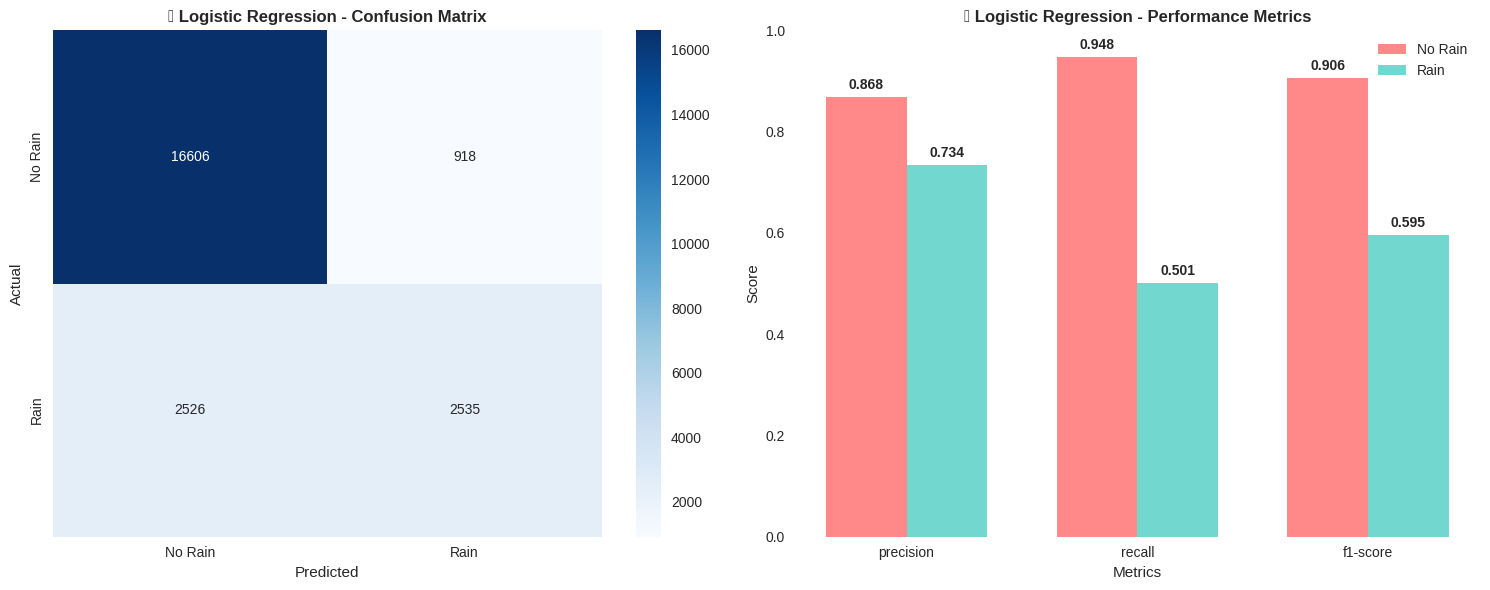


📋 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17524
           1       0.73      0.50      0.60      5061

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585


🎯 Random Forest
🎯 Accuracy: 0.8553 (85.53%)


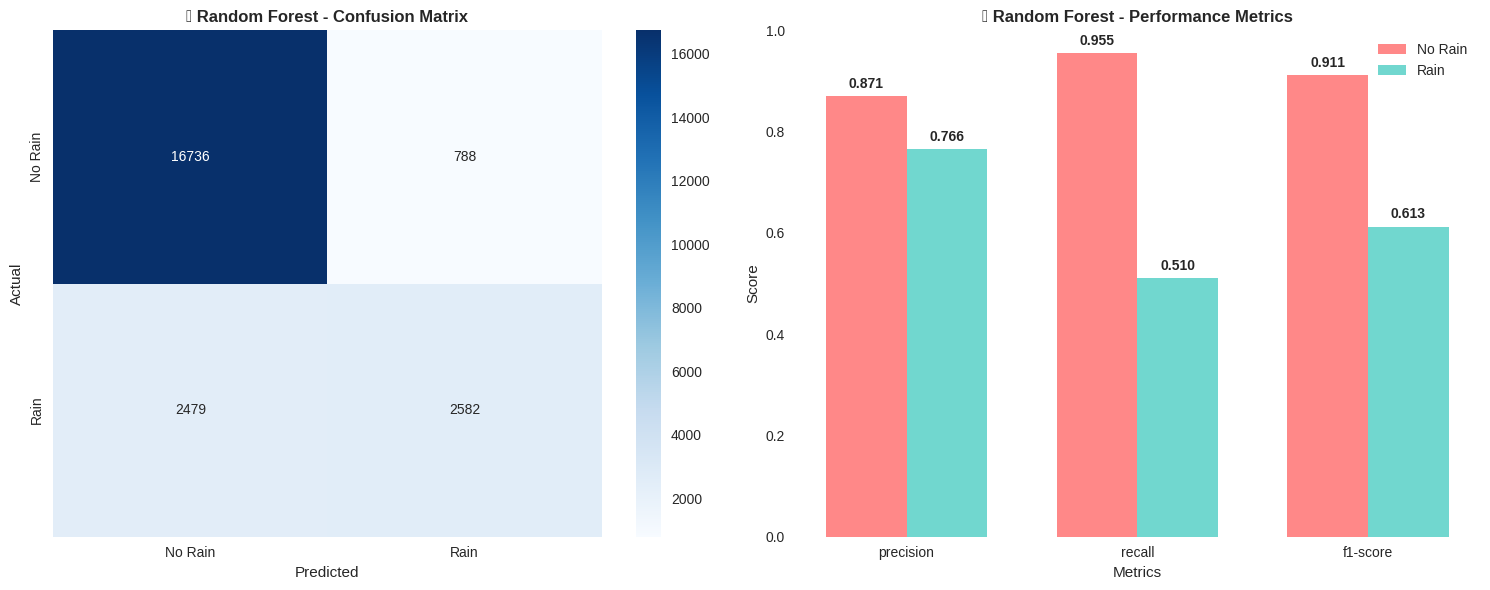


📋 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     17524
           1       0.77      0.51      0.61      5061

    accuracy                           0.86     22585
   macro avg       0.82      0.73      0.76     22585
weighted avg       0.85      0.86      0.84     22585


🎯 Decision Tree
🎯 Accuracy: 0.7847 (78.47%)


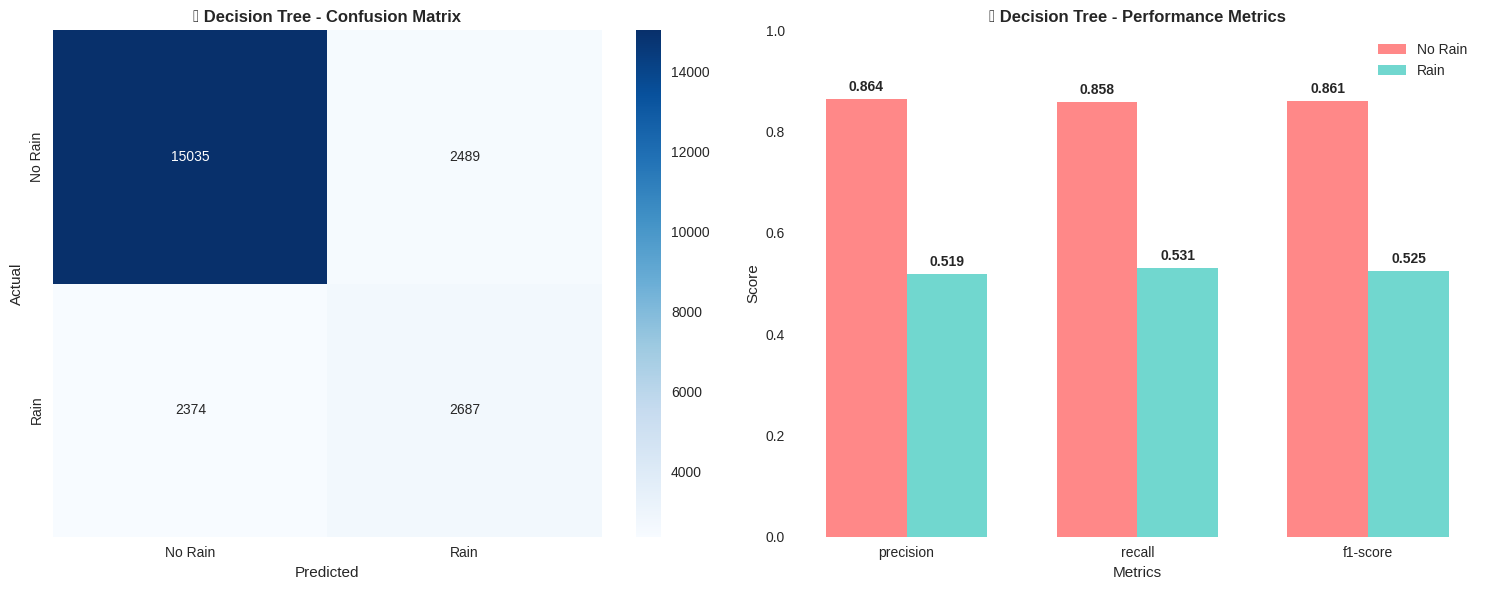


📋 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     17524
           1       0.52      0.53      0.52      5061

    accuracy                           0.78     22585
   macro avg       0.69      0.69      0.69     22585
weighted avg       0.79      0.78      0.79     22585


🏆 MODEL COMPARISON


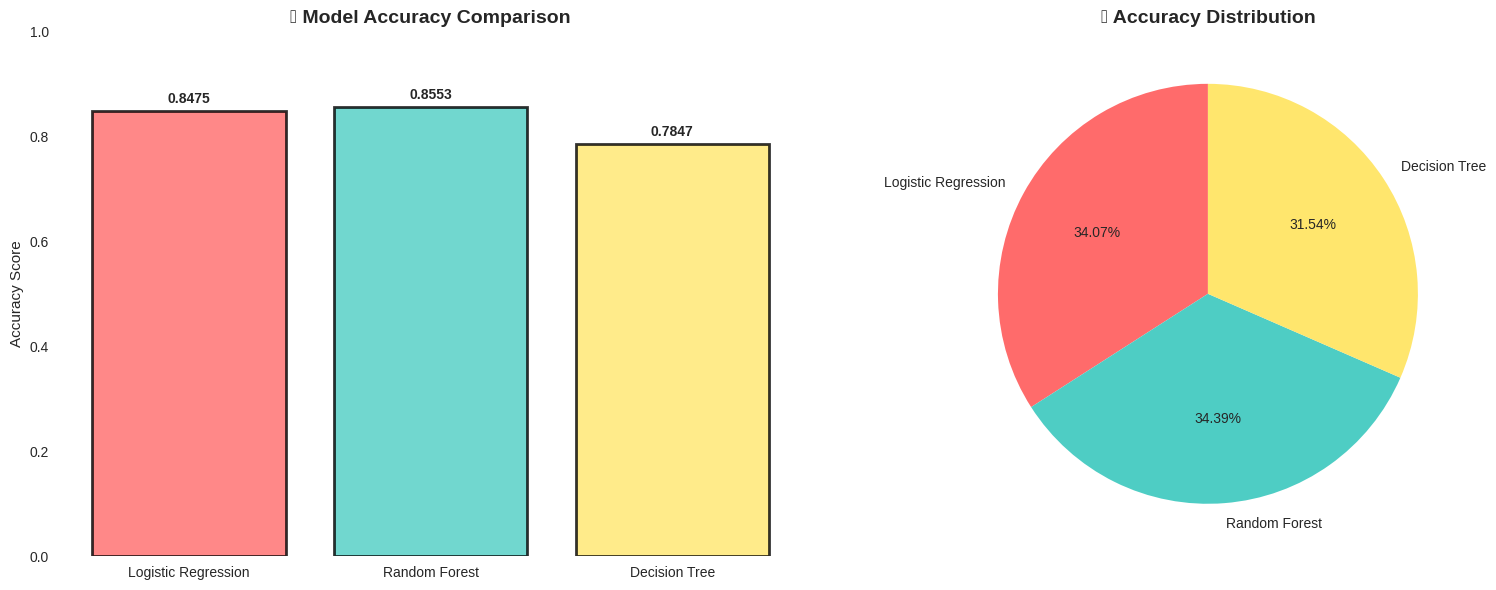

In [ ]:
# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Logistic Regression", 'green')
evaluate_model(y_test, y_pred_rf, "Random Forest", 'blue')
evaluate_model(y_test, y_pred_dt, "Decision Tree", 'orange')


# Model Comparison
print("\n🏆 MODEL COMPARISON")
print("=" * 20)

models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_dt)
]

# Create beautiful comparison charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart comparison
colors = ['#FF6B6B', '#4ECDC4', '#FFE66D']
bars = ax1.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_title('🏆 Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy Score')
ax1.set_ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Pie chart for visual comparison
ax2.pie(accuracies, labels=models, autopct='%1.2f%%', colors=colors, startangle=90)
ax2.set_title('📊 Accuracy Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



🥇 Best Model: Random Forest with 0.8553 accuracy!

🔍 FEATURE IMPORTANCE ANALYSIS


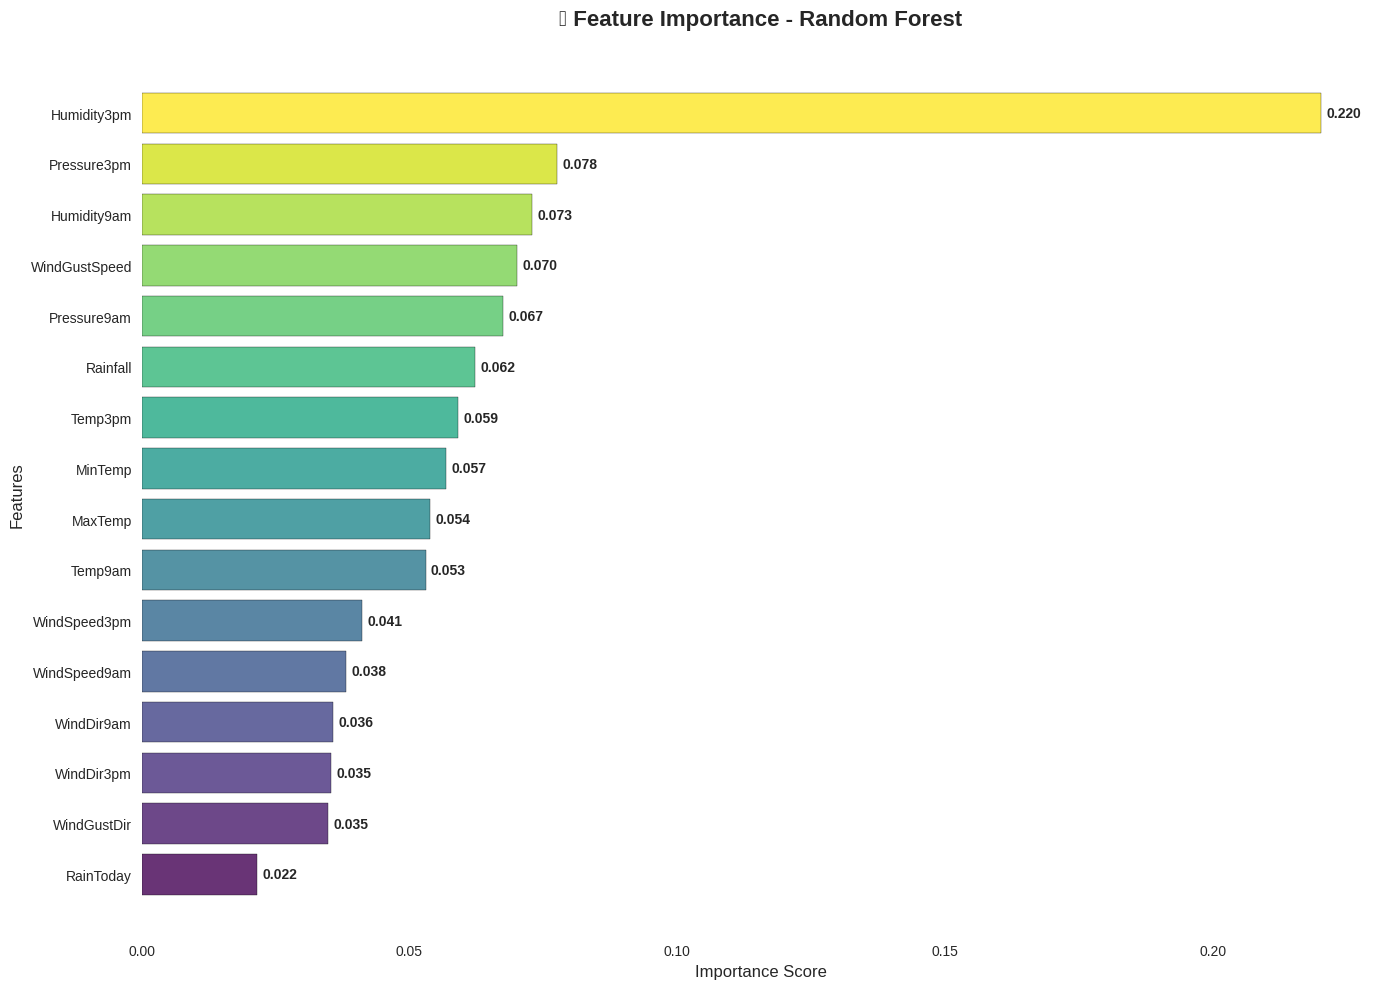


🏅 TOP 5 MOST IMPORTANT FEATURES:
1. Pressure9am: 0.0674
2. WindGustSpeed: 0.0701
3. Humidity9am: 0.0729
4. Pressure3pm: 0.0776
5. Humidity3pm: 0.2202

🎉 ANALYSIS COMPLETE! 🎉


In [ ]:
# Print winner
best_model_idx = np.argmax(accuracies)
print(f"\n🥇 Best Model: {models[best_model_idx]} with {accuracies[best_model_idx]:.4f} accuracy!")


# Feature Importance Analysis
print("\n🔍 FEATURE IMPORTANCE ANALYSIS")
print("=" * 35)

importances = rf.feature_importances_
features = df.drop('RainTomorrow', axis=1).columns

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=True)

# Beautiful feature importance visualization
plt.figure(figsize=(14, 10))

# Horizontal bar chart with gradient colors
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'],
                color=colors, alpha=0.8, edgecolor='black')

plt.title("🔍 Feature Importance - Random Forest", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for i, (bar, importance) in enumerate(zip(bars, feature_importance_df['Importance'])):
    plt.text(importance + 0.001, bar.get_y() + bar.get_height()/2,
             f'{importance:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Top 5 features
print(f"\n🏅 TOP 5 MOST IMPORTANT FEATURES:")
top_features = feature_importance_df.tail(5)
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    print(f"{i}. {row['Feature']}: {row['Importance']:.4f}")


print("\n" + "="*60)
print("🎉 ANALYSIS COMPLETE! 🎉")
print("="*60)
